In [1]:
%pip install langchain-community pypdf
%pip install langchain_core
%pip install langgraph
%pip install langchain_openai
%pip install langchain_chroma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/6

## PDF 읽기

- 서울 2040 도시 계획
- 뉴욕 2050 도시 계획


In [2]:
from langchain_community.document_loaders import PyPDFLoader

loader_seoul = PyPDFLoader("https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf")
# loader_nyc = PyPDFLoader("https://climate.cityofnewyork.us/wp-content/uploads/2024/09/OneNYC_2050_Strategic_Plan.pdf")
# loader = PyPDFLoader("https://image.samsungsds.com/kr/downloads/download/__icsFiles/afieldfile/2024/07/19/%EC%82%BC%EC%84%B1SDS_%EC%A7%80%EC%86%8D%EA%B0%80%EB%8A%A5%EA%B2%BD%EC%98%81%EB%B3%B4%EA%B3%A0%EC%84%9C_2024.pdf?queryString=20240719035534")
data_seoul = loader_seoul.load()
# data_nyc = loader_nyc.load()
print(data_seoul)
# print(data_nyc)

[Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2020 11.0.0.5178', 'creationdate': '2024-12-12T18:16:11+09:00', 'author': 'SI', 'moddate': '2024-12-12T18:16:11+09:00', 'pdfversion': '1.4', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205, 'page': 0, 'page_label': '1'}, page_content=''), Document(metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2020 11.0.0.5178', 'creationdate': '2024-12-12T18:16:11+09:00', 'author': 'SI', 'moddate': '2024-12-12T18:16:11+09:00', 'pdfversion': '1.4', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205, 'page': 1, 'page_label': '2'}, page_content='「2040 서울도시기본계획」을 발간하며\n지난 3년간 코로나19 팬데믹으로 전 세계가 심각한 타격을 받아왔지만, 대한민국의 수도 서울은 혁신적인 디지털 기술과 뛰어난 시민 의식, 풍부한 자연환경을 토대로 도시의 가능성과 잠재력을 확인할 수 있었습니다. 「2040 서울도시기본계획」은 기후위기, 디지털 전환, 생활양식의 변화 등 글로벌 대도시가 당면한 과제에 대한 해법을 제시하고 있습니다.첫째, 보행일상권으로의 공간구조 개편입니다. 서울을 하나의 기준으로 관리하던 지금까지의

## 청크 단위로 쪼개기

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
)

all_splits = text_splitter.split_documents(data_seoul)
print(len(all_splits))
# all_splits += text_splitter.split_documents(data_nyc)


print(all_splits[100])
print('--'*50)
print(all_splits[101])

309
page_content='광역화 대응스마트 교통·물류체계 구축을 위한기반시설의 입체적 활용 도모5-3-1입체적 개발을 통한 사람 중심의 교통환경 조성과 생활물류서비스 지원5-3-2효율적이고 친환경적인 스마트 도시물류체계 구축보행자 친화 도시 구축을 위한 안전하고 쾌적한 보행환경 조성5-4-1보행자가 안전한 도시·생활환경 조성 지속 추진5-4-2교통수단의 오염물질 배출 감소를 위한 다각적인 방안 마련6. “사회·문화” 부문시민이 함께 사는 환경을 위한지역공동체 문화 정착6-1-1공동체 활성화를 위한 지원체계 마련6-1-2다양한 세대가 함께 사는 주거공간과 서비스 제공모두의 동등한 생활을 위한 차별 없는 생활환경 조성6-2-1평등하고 건강한 노동환경 조성6-2-2모든 시민의 적극적 사회참여 활동 보장6-2-3다양한 사회 구성원 존중 및 인정시민 일상생활의 여유를 위한 생애단계별 지원체계 구축6-3-1생애주기별 문화예술교육체계 정착6-3-2생애발달단계와 생애전환기에 따른 맞춤형 교육시스템 구축6-3-3시민의 건강한 삶을 보장하기 위한 공공보건의료체계 구축고령사회대응과 세대통합을 위한 사회안전망 구축6-4-1세대를 아우르는 사회적 돌봄 강화6-4-2세대 간 형평성 제고 및 미래세대 보호를 위한 제도적 지원' metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2020 11.0.0.5178', 'creationdate': '2024-12-12T18:16:11+09:00', 'author': 'SI', 'moddate': '2024-12-12T18:16:11+09:00', 'pdfversion': '1.4', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205, 'page': 73, 'page_label': '74'}
----------------------------

In [4]:
print(type(all_splits[100]))

<class 'langchain_core.documents.base.Document'>


## OpenAI Embedding Model 사용하기

In [6]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [7]:
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
import os

load_dotenv()

embedding = OpenAIEmbeddings(model='text-embedding-3-large', api_key=OPENAI_API_KEY)
v = embedding.embed_query("잠실 개발 계획에 대해 알려줘")
print(v)
print(len(v))

[0.023547295480966568, -0.013092629611492157, -0.006730278022587299, 0.013641048222780228, 0.018868381157517433, 0.03057260811328888, 0.002672673435881734, 0.04051356390118599, -0.024671901017427444, 0.025143956765532494, 0.002481768373399973, 0.01964588649570942, 0.03190547227859497, 0.022700369358062744, 0.025366101413965225, 0.00207739626057446, -0.025421638041734695, 0.014522682875394821, 0.02742093615233898, -0.03268297761678696, 0.01304403506219387, -0.03834765776991844, 0.019271017983555794, 0.0004147850559093058, -0.012676108628511429, 0.010683751665055752, 0.005893765948712826, 0.031072432175278664, -0.014133930206298828, 0.005508484318852425, -0.011870835907757282, 0.0018916975241154432, -0.00637970631942153, -0.010093681514263153, -0.022228313609957695, 0.029545191675424576, 0.03387700393795967, 0.016938501968979836, -0.018396323546767235, 0.03057260811328888, 0.007323819678276777, 0.003370345337316394, -0.026129722595214844, -0.004380407743155956, 0.009198161773383617, 0.00

## vector DB의 일종인 chroma DB 설치

In [8]:
from langchain_chroma import Chroma
import os

persist_directory = './chroma_store'

if not os.path.exists(persist_directory):
    print('Creating new Chroma store')
    vectorstore = Chroma.from_documents(
        documents=all_splits,
        embedding=embedding,
        persist_directory=persist_directory
    )
else:
    print('Loading existing Chroma store')
    vectorstore = Chroma(
        embedding_function=embedding,
        persist_directory=persist_directory
    )

Creating new Chroma store


In [9]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
docs = retriever.get_relevant_documents("서울시는 잠실 일대에 어떤 계획이 있나요")

for doc in docs:
    print(doc.metadata)
    print(doc.page_content)
    print('---'*20)

<ipython-input-9-cd8e3b1b7336>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents("서울시는 잠실 일대에 어떤 계획이 있나요")


{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 46, 'page_label': '47', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
제1절 서울의 변화진단393) 2040 수도권 광역도시계획(수립 중)매력적이고 살기 좋은, 국제경쟁력을 갖춘, 상생·통합의 수도권을 강조Ÿ수도권 광역도시계획은 「국토의 계획 및 이용에 관한 법률」 제11조에 따라 수도권의 공간구조 및 기능을 상호 연계하고, 환경을 보전하며 광역시설을 체계적으로 정비하기 위하여 수립하는 계획으로 도시·군기본계획에 방향성을 제시하는 상위 계획이다.Ÿ2019년부터 서울시, 인천시, 경기도가 공동으로 수립 중인 2040 수도권 광역도시계획에서는 “살기 좋고 국제경쟁력을 갖춘 상생·통합의 수도권”을 비전으로 설정하고, 3대 발전목표와 10년 내 우선 추진해야 할 핵심과제들을 제시하고 있다.Ÿ또한 수도권의 현안이슈 및 메가트렌트를 고려하여 토지이용, 광역교통, 녹지환경, 문화여가, 방재안전, 개발제한구역 등 주요 부문별 기본 방향과 추진과제들을 제시하고, 광역생활권 단위의 공간구조 및 발전방향 구상으로 시·군 간 상호 연계를 강화하고 있다.Ÿ금번 도시기본계획에서는 수도권 차원의 부문별 계획 기본 방향과의 정합성을 유지하고, 광역생활권 단위의 중심지(광역·권역·지역거점), 발전축(교통축), 보전축(녹지축, 수계축) 등을 반영하여 수립하였다.4) 서울시 지역균형발전계획서울시 각종 균형발전 정책 종합하여 지역 간 격차해소 및 특화발전을 위한 5대 추진전략 

### 주어진 청크에 기반하여 언어 모델로 답변 생성하기

In [10]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4.1-mini', api_key=OPENAI_API_KEY)
llm.invoke('안녕?')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_79b79be41f', 'id': 'chatcmpl-BQzHker7gMkgeZoiy3gATgfxDueLf', 'finish_reason': 'stop', 'logprobs': None}, id='run-01cb3bb7-7e71-48e4-99b8-ed48d40d1b16-0', usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
from langchain_core.prompts import PromptTemplate
### Generate
# PromptTemplate을 사용하여 RAG를 위한 프롬프트를 생성합니다.

rag_generate_system = """
너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다.
주어진 context는 vectorstore에서 검색된 결과이다.
사용자의 질문(query)에 대해 검색된 context를 기반으로 기존 대화 messages를 고려하여 답변하라.

=================================
messages: {messages}
query: {query}
context: {context}
"""

# PromptTemplate을 생성하여 question과 context를 포맷팅
rag_prompt = PromptTemplate(
    input_variables=["query", "context", "messages"],
    template=rag_generate_system
)

# rag chain
rag_chain = rag_prompt | llm

# 사용자 질문과 검색된 문서를 입력으로 사용하여 RAG를 실행
query = "서울시는 잠실 일대에 어떤 계획이 있나요?"

response = rag_chain.invoke({"query": query, "context": docs, "messages": []})
print(response.content)


서울시는 잠실 일대를 매력적인 글로벌 관광거점 및 광역중심으로 육성하는 계획을 추진하고 있습니다. 구체적으로,

- 잠실 광역중심을 국제교류복합지구와 연계하여 관광, 여가, 쇼핑 기능을 구축·강화합니다.
- 강남 도심의 국제업무 기능을 보완하는 대규모 전시·컨벤션시설을 집중 공급할 예정입니다.
- 잠실종합운동장과 올림픽공원 간 연계를 강화하여 한국 스포츠산업 중심지로 특화하는 전략을 세우고 있습니다.
- 이외에도 잠실 지역을 서울의 매력적인 글로벌 관광거점으로서 인프라 확충과 콘텐츠를 풍부하게 하는 데 중점을 두고 있습니다.

이 계획은 2040 서울 도시기본계획 및 수도권 광역도시계획의 방향과 맞물려 글로벌 경쟁력과 지역 균형발전을 목표로 추진되고 있습니다.


# State

In [12]:
from typing import List
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage

class GraphState(TypedDict):
    query: str   # 사용자 질문
    generation: str # LLM 생성 결과
    documents: List[str] # 검색된 문서
    messages: List[BaseMessage]

In [13]:
def retrieve(state):
    """
    vectorstore에서 질문에 대한 문서를 검색합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------RETRIEVE------')
    query = state["messages"][-1].content
    print(f"query: {query}")

    # Retrieve documents
    documents = retriever.invoke(query)

    for doc in documents:
        print(doc.metadata)
        print(doc.page_content)
        print('---'*20)

    return {
        "query": query,
        "documents": documents
    }

In [14]:
def generate(state):
    """
    LLM을 사용하여 문서와 사용자 질문에 대한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): LLM 생성 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GENERATE------')
    query = state['query']
    documents = state['documents']
    messages = state['messages']
    generation = rag_chain.invoke({"query": query, "context": documents, "messages": messages})


    messages.append(generation)

    return {
        "generation": generation,
        "messages": messages
    }

## LangGraph 워크플로우 만들기

In [15]:
from langgraph.graph import START, StateGraph, END

workflow = StateGraph(GraphState)

# workflow에 노드 추가
workflow.add_node("retrieve", retrieve)
workflow.add_node("generate", generate)

# workflow에 edge 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", END)

app = workflow.compile()

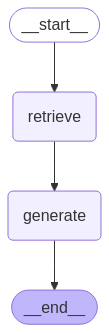

In [16]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    #  실패 시 통과
    pass


In [17]:
from langchain_core.messages import HumanMessage, SystemMessage

state = {
    "messages": [
        SystemMessage(
            content="너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. "
                    "주어진 context는 vectorstore에서 검색된 결과이다. "
                    "주어진 context를 기반으로 사용자의 question에 대해 답변하라."
        ),
    ],
    "query": "",
    "generation": "",
    "documents": []
}

In [18]:
state["messages"].append(HumanMessage(content="서울시는 잠실 일대에 어떤 계획이 있나요?"))

app.invoke(state)

print('---------------------------')
for message in state['messages']:
    message.pretty_print()

------RETRIEVE------
query: 서울시는 잠실 일대에 어떤 계획이 있나요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 175, 'page_label': '176', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
Ÿ녹색교통을 정착하고 교통수요관리를 강화하기 위하여 친환경 차량 우대, 공해차량 제재 등 탄력적 교통수요관리 체계에 의해 승용차 통행수요가 대중교통으로 전환되도록 유도하고 보도와 자전거도로, 개인형 이동장치(PM)를 위한 인프라 등을 확충한다.Ÿ삼성역 일대에는 광역교통을 처리하는 강남권 광역복합환승센터와 자율주행자동차·도심항공교통(UAM) 등 미래교통수단을 연계하는 모빌리티 허브 및 관련 인프라를 조성·확충하며 교통안전시설을 고도화한다.Ÿ강남도심의 주거 기능을 보완하여 도심부 활력을 증진할 수 있도록 외국인, 청년, 신혼부부 등 도심주거 수요를 고려하여 다양한 도심형 주거와 생활편의시설 공급을 유도한다. 잠실 광역중심, 국제업무 기능을 보완하는 매력적인 글로벌 관광거점으로 육성Ÿ잠실 광역중심을 국제교류복합지구와 연계하여 관광·여가·쇼핑 기능을 구축·강화하고 강남도심의 국제업무 기능을 보완하는 대규모 전시·컨벤션을 집중 공급한다.-잠실종합운동장과 올림픽공원 간 연계를 강화하여 한국 스포츠산업 중심지로 특화하고 테헤란로 업무 및 MICE 산업벨트를 확대·육성Ÿ서울을 대표하는 관광거점으로서 지속적인 인프라 확충뿐만 아니라 콘텐츠가 풍부한 매력 있는 공간으로 육성한다. 수서·문정 지역중

In [19]:
state["messages"].append(HumanMessage(content="상암은?"))

app.invoke(state)

print('---------------------------')
for message in state['messages']:
    message.pretty_print()

------RETRIEVE------
query: 상암은?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 163, 'page_label': '164', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
[표 5-4] 서북권 발전방향 및 계획과제
1) 도시공간상암·수색 광역중심, 국제적 창조문화 중심지로 육성을 위한 가용지 활용과 광역교통체계 정비Ÿ상암·수색 광역중심은 상업·업무 토지이용 극대화 및 주변 중심지와 연계로 R&D 관련 산업생태계가 구축되고, 상암 디지털미디어센터(DMC)의 디지털 미디어 산업이 고도화되며, 수색역사 복합개발 및 철도 가용지 개발로 서북권 균형발전에 기여한다.-수색역 일대를 디지털미디어산업의 중심거점과 서북권 광역교통 결절점으로 역할을 할 수 있도록 차량기지 등 철도부지를 활용하여 첨단 미디어 기능을 비롯하여 미래첨단산업 플랫폼과 복합 상업공간으로 조성Ÿ난지도의 경우 지역 성장을 위한 가용지로 적극 활용하고 상암~난지도~마곡 간 월드컵대교 추가 교량 완공 등 연결성을 강화하여 글로벌 창조문화산업 혁신공간으로 조성한다.Ÿ서부운전면허시험장부지, 은평공영차고지, 마포 농수산물시장부지 등 저이용 유휴 부지를 활용하여 복합개발을 추진하고 인력 양성 및 연구기능을 조성하며 상암·수색 광역중심과 연계하여 서북권의 기술혁신 산업거점으로 구축한다.-서부운전 면허시험장 일대를 방송·영상산업의 거점인 상암 DMC와 기능을 연계하여 DMC를 지원하는 업무와 여가·문화 및 주거 복합 기능 도입
-------

## Query Augmentation 추가
- 사용자의 마지막 질문이 벡터 검색하는데 적절치 않을 수 있으므로, 벡터 검색을 위한 문구로 수정 필요.

In [20]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser

def query_augmentation(state) -> GraphState:
    """
    RAG를 위한 쿼리 증강을 수행합니다.
    """

    print("#### query augmentation ####")

    query_augmentation_prompt = ChatPromptTemplate.from_messages(
        [
            MessagesPlaceholder(variable_name="messages"),
            (
                "system",
                """기존 대화 내용을 활용하여, 사용자가 질문한 의도를 파악하여, 한 문장의 명료한 질문으로 변환하라.
                대명사, 이, 저, 그  같은 표현은 명확한 명사로 표현하라"""
            )
        ]
    )

    query_augmentation_chain = query_augmentation_prompt | llm | StrOutputParser()

    augmented_question = query_augmentation_chain.invoke({
        "messages": state["messages"]
    })

    print("augmented_question\t:", augmented_question)

    return {
        "query": augmented_question,
    }

In [21]:
def retrieve(state):
    """
    vectorstore에서 질문에 대한 문서를 검색합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------RETRIEVE------')
    # query = state["messages"][-1].content
    query = state["query"]
    print(f"query: {query}")

    # Retrieve documents
    documents = retriever.invoke(query)
    for doc in documents:
        print(doc.metadata)
        print(doc.page_content)
        print('---'*20)

    return {
        "query": query,
        "documents": documents
    }

## query augmentation 추가한 워크플로우

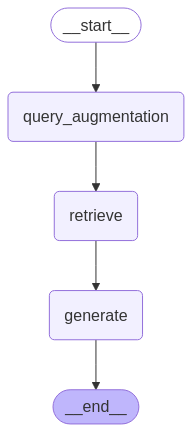

In [22]:
workflow = StateGraph(GraphState)

# workflow에 노드 추가
workflow.add_node("query_augmentation", query_augmentation)
workflow.add_node("retrieve", retrieve)
workflow.add_node("generate", generate)
# workflow에 edge 추가
workflow.add_edge(START, "query_augmentation")
workflow.add_edge("query_augmentation", "retrieve")
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", END)

app = workflow.compile()

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    #  실패 시 통과
    pass

### State 초기화 하고 다시 시작

In [23]:
state = {
    "messages": [
        SystemMessage(
            content="너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. "
                    "주어진 context는 vectorstore에서 검색된 결과이다. "
                    "주어진 context를 기반으로 사용자의 question에 대해 답변하라."
        ),
    ],
    "query": "",
    "generation": "",
    "documents": []
}

state["messages"].append(HumanMessage(content="서울시는 잠실 일대에 어떤 계획이 있나요?"))
app.invoke(state)

print('---------------------------')

for message in state['messages']:
    message.pretty_print()



#### query augmentation ####
augmented_question	: 서울시는 잠실 일대에 대한 도시 계획에 대해 무엇을 계획하고 있나요?
------RETRIEVE------
query: 서울시는 잠실 일대에 대한 도시 계획에 대해 무엇을 계획하고 있나요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 175, 'page_label': '176', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
Ÿ녹색교통을 정착하고 교통수요관리를 강화하기 위하여 친환경 차량 우대, 공해차량 제재 등 탄력적 교통수요관리 체계에 의해 승용차 통행수요가 대중교통으로 전환되도록 유도하고 보도와 자전거도로, 개인형 이동장치(PM)를 위한 인프라 등을 확충한다.Ÿ삼성역 일대에는 광역교통을 처리하는 강남권 광역복합환승센터와 자율주행자동차·도심항공교통(UAM) 등 미래교통수단을 연계하는 모빌리티 허브 및 관련 인프라를 조성·확충하며 교통안전시설을 고도화한다.Ÿ강남도심의 주거 기능을 보완하여 도심부 활력을 증진할 수 있도록 외국인, 청년, 신혼부부 등 도심주거 수요를 고려하여 다양한 도심형 주거와 생활편의시설 공급을 유도한다. 잠실 광역중심, 국제업무 기능을 보완하는 매력적인 글로벌 관광거점으로 육성Ÿ잠실 광역중심을 국제교류복합지구와 연계하여 관광·여가·쇼핑 기능을 구축·강화하고 강남도심의 국제업무 기능을 보완하는 대규모 전시·컨벤션을 집중 공급한다.-잠실종합운동장과 올림픽공원 간 연계를 강화하여 한국 스포츠산업 중심지

In [24]:
state["messages"].append(HumanMessage(content="상암은?"))
app.invoke(state)

for message in state['messages']:
    message.pretty_print()

#### query augmentation ####
augmented_question	: 서울시는 상암 일대에 대해 어떤 도시 계획을 추진하고 있나요?
------RETRIEVE------
query: 서울시는 상암 일대에 대해 어떤 도시 계획을 추진하고 있나요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 130, 'page_label': '131', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
제2절 토지이용계획123Ÿ주요 산 주변과 구릉지 등 자연 자원 연접부의 경우 산 조망과 지형 특성을 보호할 수 있도록 자연과 조화를 이루는 스카이라인을 조성한다. -내외사산, 배후산, 자연녹지 등에 대하여 통경축 확보 및 지형 보호를 위한 배치계획 유도Ÿ한강·지천 등 수변부에는 변화감이 있고 다양한 경관을 형성하되, 수변의 개방감을 확보할 수 있도록 통경축을 고려하고 위압감을 완화할 수 있는 스카이라인 형성을 유도한다.Ÿ역사문화유산 연접부를 자원 보호의 원칙으로 도시계획적 관리방안을 마련하여 체계적으로 관리한다.정비지원계획10) 추진과 연계한 공동주택 경관관리방안 마련Ÿ‘현상설계’ 등을 적용하고 특별건축구역 등 관련 제도를 적극 활용하여 다양하고 창의적이며 도시맥락과 조화로운 건축디자인을 유도한다.Ÿ거대블록(슈퍼블록)으로 조성되었던 하나의 단지를 여러 개 중소블록으로 재구성하고 단지 내 공공보행통로 조성 등 주변 지역과 보행동선을 연계하여 단절성을 극복하고 주변과 소통하는 열린 생활공간을 조성한다.
10) 정비

## 불필요한 청크는 답변에 방해가 되므로, 미리 제거하자.

In [25]:
from pydantic import BaseModel, Field
from typing_extensions import Literal
from langchain_core.prompts import PromptTemplate

class GradeDocuments(BaseModel):
    """검색된 문서가 질문과 관련성 있는지 yes 또는 no로 평가합니다."""

    binary_score: Literal["yes", "no"] = Field(
        description="문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 평가합니다."
    )

structured_llm_grader = llm.with_structured_output(GradeDocuments)


def grade_documents(state):
    """
    검색된 문서를 평가하여 질문과 관련성이 있는지 확인합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 관련성이 있는 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GRADE------')
    query = state['query']
    documents = state['documents']
    filtered_docs = []

    grader_prompt = PromptTemplate.from_template("""
    당신은 검색된 문서가 사용자 질문과 관련이 있는지 평가하는 평가자입니다. \n
    문서에 사용자 질문과 관련된 키워드 또는 의미가 포함되어 있으면, 해당 문서를 관련성이 있다고 평가하십시오. \n
    엄격한 테스트가 필요하지 않습니다. 목표는 잘못된 검색 결과를 걸러내는 것입니다. \n
    문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 부여하십시오.

    Retrieved document: \n {document} \n\n
    User query: {query}
    """)

    retrieval_grader = grader_prompt | structured_llm_grader

    for i, doc in enumerate(documents):
        is_relevant = retrieval_grader.invoke({"query": query, "document": doc.page_content})
        print(f"Document {i} relevance: {is_relevant.binary_score}")
        if is_relevant.binary_score == "yes":
            filtered_docs.append(doc)

    return {"documents": filtered_docs}

## State 초기화

In [26]:
state = {
    "messages": [
        SystemMessage(
            content="너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. "
                    "주어진 context는 vectorstore에서 검색된 결과이다. "
                    "주어진 context를 기반으로 사용자의 question에 대해 답변하라."
        ),
    ],
    "query": "",
    "generation": "",
    "documents": []
}

## 워크플로우 다시 선언하기

In [27]:
workflow = StateGraph(GraphState)

# workflow에 노드 추가
workflow.add_node("query_augmentation", query_augmentation)
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)

# workflow에 edge 추가
workflow.add_edge(START, "query_augmentation")
workflow.add_edge("query_augmentation", "retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)
app = workflow.compile()

In [28]:

state["messages"].append(HumanMessage(content="서울시는 상암동에 어떤 계획이 있나요?"))
app.invoke(state)

print('---------------------------')

for message in state['messages']:
    message.pretty_print()


#### query augmentation ####
augmented_question	: 서울시는 상암동에 관한 어떤 도시 계획을 가지고 있습니까?
------RETRIEVE------
query: 서울시는 상암동에 관한 어떤 도시 계획을 가지고 있습니까?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 130, 'page_label': '131', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
제2절 토지이용계획123Ÿ주요 산 주변과 구릉지 등 자연 자원 연접부의 경우 산 조망과 지형 특성을 보호할 수 있도록 자연과 조화를 이루는 스카이라인을 조성한다. -내외사산, 배후산, 자연녹지 등에 대하여 통경축 확보 및 지형 보호를 위한 배치계획 유도Ÿ한강·지천 등 수변부에는 변화감이 있고 다양한 경관을 형성하되, 수변의 개방감을 확보할 수 있도록 통경축을 고려하고 위압감을 완화할 수 있는 스카이라인 형성을 유도한다.Ÿ역사문화유산 연접부를 자원 보호의 원칙으로 도시계획적 관리방안을 마련하여 체계적으로 관리한다.정비지원계획10) 추진과 연계한 공동주택 경관관리방안 마련Ÿ‘현상설계’ 등을 적용하고 특별건축구역 등 관련 제도를 적극 활용하여 다양하고 창의적이며 도시맥락과 조화로운 건축디자인을 유도한다.Ÿ거대블록(슈퍼블록)으로 조성되었던 하나의 단지를 여러 개 중소블록으로 재구성하고 단지 내 공공보행통로 조성 등 주변 지역과 보행동선을 연계하여 단절성을 극복하고 주변과 소통하는 열린 생활공간을 조성한다.
10) 정비계획 수

In [29]:

state["messages"].append(HumanMessage(content="잠실은?"))
app.invoke(state)

print('---------------------------')

for message in state['messages']:
    message.pretty_print()


#### query augmentation ####
augmented_question	: 서울시가 잠실에 추진하는 도시 계획은 무엇인가요?
------RETRIEVE------
query: 서울시가 잠실에 추진하는 도시 계획은 무엇인가요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 175, 'page_label': '176', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
육성-수서역공영주차장, 수서차량기지 유휴공간 등을 활용하여 신산업 관련 앵커시설을 비롯한 업무·산업·주거·상업·첨단물류시설, 녹지 등의 복합개발을 검토Ÿ탄천으로 단절된 수서~문정 간 대중교통·자전거·보행 연계체계를 강화하여 수서·문정 지역중심 내 원활한 기능 분담 및 연계로 중심지 기능을 고도화한다.천호·길동 지역중심, 자족기능 강화 및 청년문화 혁신거점 조성Ÿ천호·길동 지역중심을 강남 도심 및 잠실 광역중심과 연결·확장되는 동부 광역연계 거점으로 성장할 수 있도록 천호대로와 양재대로변을 중심으로 역세권 관련 사업 등을 적극 추진하여 고밀복합개발을 유도하고 업무·상업기능과 생활문화기반을 강화한다.
------------------------------------------------------------
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09

### 만약 RAG가 불필요한 질문을 한다면?

--> 엉뚱한 답변을 함

In [30]:

state["messages"].append(HumanMessage(content="잘했어."))
app.invoke(state)

print('---------------------------')

for message in state['messages']:
    message.pretty_print()


#### query augmentation ####
augmented_question	: 서울시가 잠실에 추진하는 구체적인 도시 계획은 무엇인가요?
------RETRIEVE------
query: 서울시가 잠실에 추진하는 구체적인 도시 계획은 무엇인가요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 175, 'page_label': '176', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
육성-수서역공영주차장, 수서차량기지 유휴공간 등을 활용하여 신산업 관련 앵커시설을 비롯한 업무·산업·주거·상업·첨단물류시설, 녹지 등의 복합개발을 검토Ÿ탄천으로 단절된 수서~문정 간 대중교통·자전거·보행 연계체계를 강화하여 수서·문정 지역중심 내 원활한 기능 분담 및 연계로 중심지 기능을 고도화한다.천호·길동 지역중심, 자족기능 강화 및 청년문화 혁신거점 조성Ÿ천호·길동 지역중심을 강남 도심 및 잠실 광역중심과 연결·확장되는 동부 광역연계 거점으로 성장할 수 있도록 천호대로와 양재대로변을 중심으로 역세권 관련 사업 등을 적극 추진하여 고밀복합개발을 유도하고 업무·상업기능과 생활문화기반을 강화한다.
------------------------------------------------------------
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T1

## RAG가 불필요한 경우에는 일반 대화로 돌리자

In [31]:

class RouteQuery(BaseModel):
    """사용자 쿼리를 가장 관련성이 높은 데이터 소스로 라우팅합니다."""

    datasource: Literal["vectorstore", "casual_talk"] = Field(
        ...,
        description="""
        사용자 질문에 따라 casual_talk 또는 vectorstore로 라우팅합니다.
        - casual_talk: 일상 대화를 위한 데이터 소스. 사용자가 일상적인 질문을 할 때 사용합니다.
        - vectorstore: 사용자 질문에 답하기 위해 RAG로 vectorstore 검색이 필요한 경우 사용합니다.
        """,
    )


def route_question(state):
    """
    사용자 질문을 vectorstore 또는 casual_talk로 라우팅합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 라우팅된 데이터 소스와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------ROUTE------')

    # 특정 모델을 structured output (구조화된 출력)과 함께 사용하기 위해 설정
    structured_llm_router = llm.with_structured_output(RouteQuery)

    router_system = """
    당신은 사용자의 질문을 vectorstore 또는 casual_talk으로 라우팅하는 전문가입니다.
    - vectorstore에는 서울 발전계획과 관련된 문서가 포함되어 있습니다. 이 주제에 대한 질문에는 vectorstore를 사용하십시오.
    - 사용자의 질문이 일상 대화에 관련된 경우 casual_talk을 사용하십시오.
    """

    # 시스템 메시지와 사용자의 질문을 포함하는 프롬프트 템플릿 생성
    route_prompt = ChatPromptTemplate.from_messages([
        ("system", router_system),
        ("human", "{question}"),
    ])

    # 라우터 프롬프트와 구조화된 출력 모델을 결합한 객체
    question_router = route_prompt | structured_llm_router

    messages = state["messages"]
    question = messages[-1].content
    route = question_router.invoke({"question": question})


    print(f"---Routing to {route.datasource}---")
    return route.datasource

In [32]:
def casual_talk(state):
    """
    일상 대화를 위한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 일상 대화 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------CASUAL TALK------')
    messages = state['messages']
    question = messages[-1].content

    generation = llm.invoke(question)
    messages.append(generation)

    return {
        "generation": generation
    }

### 워크플로우 재정의

In [33]:
workflow = StateGraph(GraphState)

# workflow에 노드 추가
workflow.add_node("casual_talk", casual_talk)
workflow.add_node("query_augmentation", query_augmentation)
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)

# workflow에 edge 추가
workflow.add_conditional_edges(
    START, route_question,
    {
        "vectorstore": "query_augmentation",
        "casual_talk": "casual_talk"
    }
)

workflow.add_edge("casual_talk", END)
workflow.add_edge("query_augmentation", "retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)

app = workflow.compile()

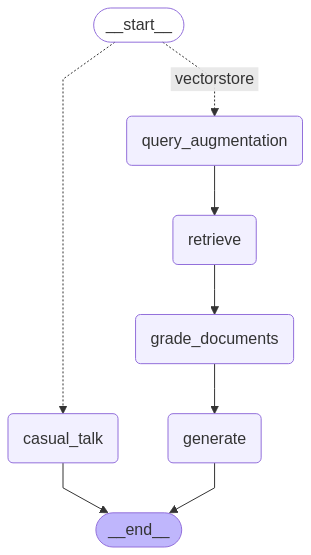

In [34]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    #  실패 시 통과
    pass


### State 초기화

In [35]:
state = {
    "messages": [
        SystemMessage(
            content="너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. "
                    "주어진 context는 vectorstore에서 검색된 결과이다. "
                    "주어진 context를 기반으로 사용자의 question에 대해 답변하라."
        ),
    ],
    "query": "",
    "generation": "",
    "documents": []
}
state["messages"].append(HumanMessage(content="서울시는 상암동에 어떤 계획이 있나요?"))

In [36]:
app.invoke(state)
print('---------------------------')
for message in state['messages']:
    message.pretty_print()

------ROUTE------
---Routing to vectorstore---
#### query augmentation ####
augmented_question	: 서울시는 상암동에 대한 어떤 도시 계획을 가지고 있나요?
------RETRIEVE------
query: 서울시는 상암동에 대한 어떤 도시 계획을 가지고 있나요?
{'author': 'SI', 'creationdate': '2024-12-12T18:16:11+09:00', 'creator': 'Hwp 2020 11.0.0.5178', 'moddate': '2024-12-12T18:16:11+09:00', 'page': 46, 'page_label': '47', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.542', 'source': 'https://urban.seoul.go.kr/UpisArchive/DATA/PWEB/STATIC/2040_seoul_plan.pdf', 'total_pages': 205}
제1절 서울의 변화진단393) 2040 수도권 광역도시계획(수립 중)매력적이고 살기 좋은, 국제경쟁력을 갖춘, 상생·통합의 수도권을 강조Ÿ수도권 광역도시계획은 「국토의 계획 및 이용에 관한 법률」 제11조에 따라 수도권의 공간구조 및 기능을 상호 연계하고, 환경을 보전하며 광역시설을 체계적으로 정비하기 위하여 수립하는 계획으로 도시·군기본계획에 방향성을 제시하는 상위 계획이다.Ÿ2019년부터 서울시, 인천시, 경기도가 공동으로 수립 중인 2040 수도권 광역도시계획에서는 “살기 좋고 국제경쟁력을 갖춘 상생·통합의 수도권”을 비전으로 설정하고, 3대 발전목표와 10년 내 우선 추진해야 할 핵심과제들을 제시하고 있다.Ÿ또한 수도권의 현안이슈 및 메가트렌트를 고려하여 토지이용, 광역교통, 녹지환경, 문화여가, 방재안전, 개발제한구역 등 주요 부문별 기본 방향과 추진과제들을 제시하고, 광역생활권 단위의 공간구조 및 발전방향 구상으로 시·군 간 상호 

In [37]:
state["messages"].append(HumanMessage(content="잘했어."))

app.invoke(state)
print('---------------------------')

for message in state['messages']:
    message.pretty_print()

------ROUTE------
---Routing to casual_talk---
------CASUAL TALK------
---------------------------
================================ System Message ================================

너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. 주어진 context는 vectorstore에서 검색된 결과이다. 주어진 context를 기반으로 사용자의 question에 대해 답변하라.
================================ Human Message =================================

서울시는 상암동에 어떤 계획이 있나요?
================================== Ai Message ==================================

현재 제공된 자료에는 서울시의 상암동에 대한 구체적인 도시 계획 정보가 포함되어 있지 않습니다. 추가적인 자료나 정보를 제공해 주시면 보다 정확한 답변을 드릴 수 있습니다. 일반적으로 상암동은 미디어, IT 중심의 디지털 미디어시티 개발과 친환경 스마트도시 조성을 목표로 하는 계획들이 추진되어 왔으니, 관련 세부 계획에 대해 궁금하시면 추가로 말씀해 주세요.
================================ Human Message =================================

잘했어.
================================== Ai Message ==================================

감사합니다! 도움이 필요하면 언제든 말씀해 주세요. 😊
